# Classify

## KNN

In [83]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

origin = np.array(cv2.imread('example\\remote_sensing.png'))
classify = np.array(cv2.imread('example\\classify.png'))[:, :, 0]

X = np.zeros((1000000, 3))
y = np.zeros((1000000))

for i in range(1000):
    X[1000 * i:1000 * (i + 1)] = origin[i]
    y[1000 * i:1000 * (i + 1)] = classify[i]

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

new_X = pca.fit_transform(X)

In [85]:
import random

select = random.sample(range(1000000), 1000)
new_X = new_X[select]
y = y[select]

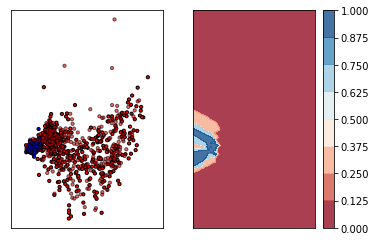

In [91]:
from sklearn.neighbors import KNeighborsClassifier

new_X = StandardScaler().fit_transform(new_X)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=.4, random_state=42)
h = 0.02
x_min, x_max = new_X[:, 0].min() - .5, new_X[:, 0].max() + .5
y_min, y_max = new_X[:, 1].min() - .5, new_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
levels = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
cs = ax.contourf(xx, yy, Z, levels, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k', s = 10)
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', s = 10, alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## Logistic

d:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


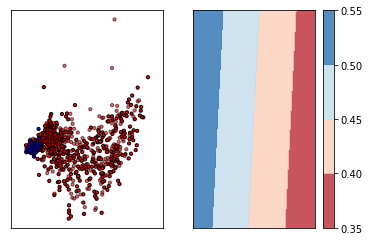

In [98]:
ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB


#clf = KNeighborsClassifier(3)
clf = LogisticRegression(penalty='l2', C = 0.001)
#clf = SVC(kernel="linear", C=100)
#clf = SVC(gamma=2, C=50)
#clf = DecisionTreeClassifier(max_depth=5)
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#clf = GaussianNB()

clf.fit(X_train, y_train)

#if hasattr(clf, "decision_function"):
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
levels = [0.35, 0.4, 0.45, 0.5, 0.55]
cs = ax.contourf(xx, yy, Z, levels, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## Linear SVM

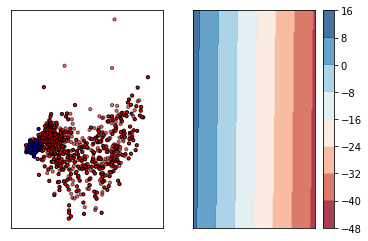

In [100]:
ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB


#clf = KNeighborsClassifier(3)
#clf = LogisticRegression(penalty='l2', C = 0.001)
clf = SVC(kernel="linear", C=100)
#clf = SVC(gamma=2, C=50)
#clf = DecisionTreeClassifier(max_depth=5)
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#clf = GaussianNB()

clf.fit(X_train, y_train)

#if hasattr(clf, "decision_function"):
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
#Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#levels = [0.35, 0.4, 0.45, 0.5, 0.55]
cs = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## Gaussian SVM

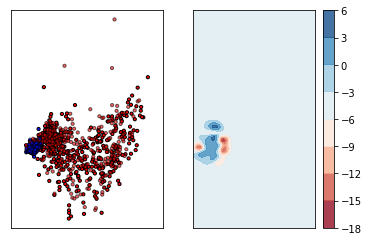

In [106]:
ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB


#clf = KNeighborsClassifier(3)
#clf = LogisticRegression(penalty='l2', C = 0.001)
#clf = SVC(kernel="linear", C=100)
clf = SVC(gamma=10, C=500)
#clf = DecisionTreeClassifier(max_depth=5)
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#clf = GaussianNB()

clf.fit(X_train, y_train)

#if hasattr(clf, "decision_function"):
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
#Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#levels = [0.35, 0.4, 0.45, 0.5, 0.55]
cs = ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## Decision Tree

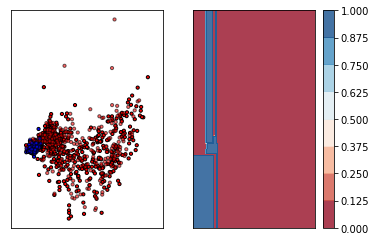

In [109]:
ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB


#clf = KNeighborsClassifier(3)
#clf = LogisticRegression(penalty='l2', C = 0.001)
#clf = SVC(kernel="linear", C=100)
#clf = SVC(gamma=2, C=50)
clf = DecisionTreeClassifier(max_depth=10)
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#clf = GaussianNB()

clf.fit(X_train, y_train)

#if hasattr(clf, "decision_function"):
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
levels = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
cs = ax.contourf(xx, yy, Z, levels, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## Random Rorest

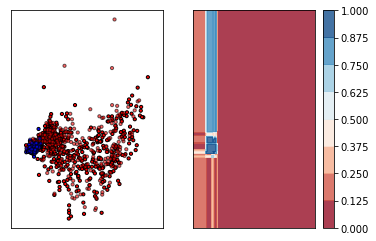

In [110]:
ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB


#clf = KNeighborsClassifier(3)
#clf = LogisticRegression(penalty='l2', C = 0.001)
#clf = SVC(kernel="linear", C=100)
#clf = SVC(gamma=2, C=50)
#clf = DecisionTreeClassifier(max_depth=10)
clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=2)
#clf = GaussianNB()

clf.fit(X_train, y_train)

#if hasattr(clf, "decision_function"):
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
levels = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
cs = ax.contourf(xx, yy, Z, levels, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## Naive Bayes

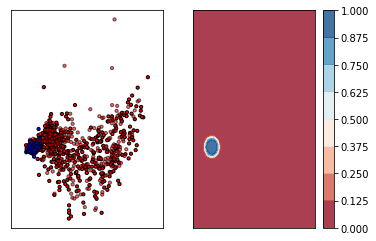

In [111]:
ax = plt.subplot(1, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', s = 10)
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', s = 10)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(1, 2, 2)

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#clf = KNeighborsClassifier(3)
#clf = LogisticRegression(penalty='l2', C = 0.001)
#clf = SVC(kernel="linear", C=100)
#clf = SVC(gamma=2, C=50)
#clf = DecisionTreeClassifier(max_depth=10)
#clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=2)
clf = GaussianNB()

clf.fit(X_train, y_train)

#if hasattr(clf, "decision_function"):
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
levels = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
cs = ax.contourf(xx, yy, Z, levels, cmap=cm, alpha=.8)
cbar = plt.colorbar(cs)


# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Clustering

## K-means

In [1]:
from scipy.cluster.vq import *
from scipy.misc import imresize
from pylab import *
from PIL import Image

def clusterpixels(infile, k, steps):
    im = array(Image.open(infile).resize((1000, 1000), Image.ANTIALIAS))
    dx = int(im.shape[0] / steps)
    dy = int(im.shape[1] / steps)
    # compute color features for each region
    features = []
    # dims = np.ndim(im)  # 除非行或列像素宽度为1，如果是单通道dims为2，多通道dims为3
    for x in range(steps):
        for y in range(steps):
            R = mean(im[x * dx:(x + 1) * dx, y * dy:(y + 1) * dy, 0])  # 图片如果不是三通道的这里需要改一下
            G = mean(im[x * dx:(x + 1) * dx, y * dy:(y + 1) * dy, 1])
            B = mean(im[x * dx:(x + 1) * dx, y * dy:(y + 1) * dy, 2])
            features.append([R, G, B])
    features = array(features, 'f')     # make into array
    # 聚类， k是聚类数目
    centroids, variance = kmeans(features, k)
    code, distance = vq(features, centroids)
    # create image with cluster labels
    codeim = code.reshape(steps, steps)
    codeim = imresize(codeim, im.shape[:2], 'nearest')
    return codeim

In [2]:
k=10
cloud = 'example\\cloud.png'
vessel = 'example\\vessel.png'
remote_sensing = 'example\\remote_sensing.png'
steps = (500, 1000)  # image is divided in steps*steps region

d:\python36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


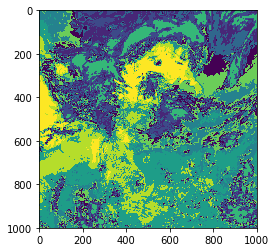

In [3]:
codeim= clusterpixels(cloud, k, steps[1])
imshow(codeim).write_png('cloud_kmeans.png')

In [4]:
colors = []

for row in codeim:
    for column in row:
        colors += [column]

colors = list(set(colors))

In [5]:
import cv2

origin = np.array(cv2.imread(cloud))
origin = origin.astype('float')

for row in (colors):
    a = codeim == row
    origin[:, :, 0][a] = np.sum(origin[:, :, 0][a]) / np.sum(a)
    origin[:, :, 1][a] = np.sum(origin[:, :, 1][a]) / np.sum(a)
    origin[:, :, 2][a] = np.sum(origin[:, :, 2][a]) / np.sum(a)

cv2.imwrite('cloud_after_kmeans.png', origin)

True